In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [3]:
sys.path.append(os.path.abspath("../"))
import pyhawkes

In [4]:
from pyhawkes.models import DiscreteTimeNetworkHawkesModelSpikeAndSlab

In [9]:
K = 3
p = 0.25
dt_max = 20
network_hypers = {"p": p, "allow_self_connections": False}
true_model = DiscreteTimeNetworkHawkesModelSpikeAndSlab(
    K=K, dt_max=dt_max, network_hypers=network_hypers)

# Generate T time bins of events from the the model
# S is the TxK event count matrix, R is the TxK rate matrix
S,R = true_model.generate(T=100)

In [12]:
#A: binary adjacency matrix (K x K), boolean
#W: gamma weights (K x K)
#g: self-exciting kernel (K x K x B); last dim (B) gives coefficients of convex combination
#λ0: offset of background process (K)
#p: sparsity of connectivity matrix 
#v: NOT SURE
#W_eff: effective connectivity matrix (KxK), equal to A .* W
#impulse_responses: (dt_max x K x K), the shape of the impulse response induced by node k in k'

A, W, g, λ0, p, v = true_model.get_parameters()
W_eff = true_model.W_effective
impulse_responses = true_model.impulses

In [42]:
true_model.basis

In [38]:
W

array([[0.06469488, 0.15453389, 0.10526427],
       [0.41235504, 0.07277602, 0.46595882],
       [0.06625381, 1.23726353, 0.03211341]])

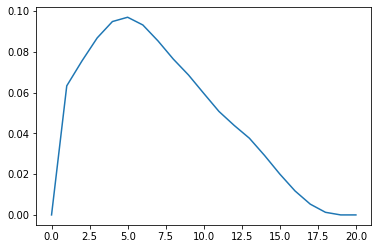

In [35]:
plt.plot(impulse_responses[:,1,1])